# Thresholding

<function matplotlib.pyplot.show(*args, **kw)>

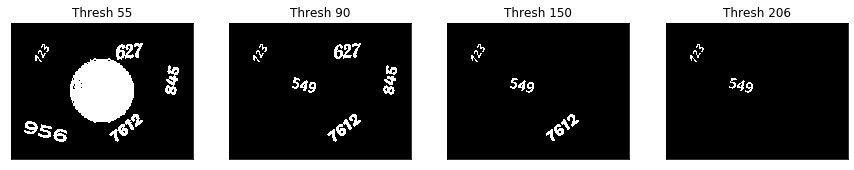

In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

#convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

THRESH1 = 55
THRESH2 = 90
THRESH3 = 150
THRESH4 = 206

ret, img_thresh1 = cv2.threshold(img_gray, THRESH1, 255, cv2.THRESH_BINARY)
ret, img_thresh2 = cv2.threshold(img_gray, THRESH2, 255, cv2.THRESH_BINARY)
ret, img_thresh3 = cv2.threshold(img_gray, THRESH3, 255, cv2.THRESH_BINARY)
ret, img_thresh4 = cv2.threshold(img_gray, THRESH4, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,15))
plt.subplot(141), plt.imshow(img_thresh1, cmap="gray"), plt.title('Thresh 55')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(img_thresh2, cmap="gray"), plt.title('Thresh 90')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(img_thresh3, cmap="gray"), plt.title('Thresh 150')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(img_thresh4, cmap="gray"), plt.title('Thresh 206')
plt.xticks([]), plt.yticks([])
plt.show


1-2. At Threshold 55, white pixel(foreground label) appears in the middle. 123, 956, 7612,845 and 627 are segmented at this threshold.
When the threshold is increased to 90, the a black pixel(blackground label) appears on the bottom left. 123, 549 7612,845 and 627 is segmented at this threshold. 
At Threshold 150, the black pixel(blackground label) appaear on the bottom left as well as on the right corner. Three numbers are segmented(549, 7812, 123).

At each threshold the image becomes blurrier and the numbers lose their sharpness. 

At threshold 206 only 123 and 549 are segmented.

# Filtering - Denoising 2.1

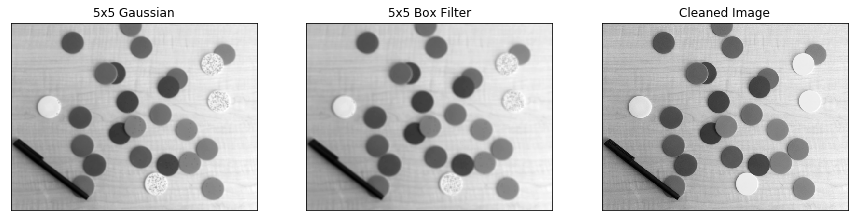

Box Filter:  32.643190528762034
Gaussian Blue:  34.458264785620116


In [92]:
img = cv2.imread('Circles_gauss.png')
img2 = cv2.imread('Circles.png')

# convert from BGR to RGB for displaying
img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 =cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# filter image using box filter
res1 = cv2.blur(img,(5,5),0)
# filter image using Gaussian Filter
res2 = cv2.GaussianBlur(img,(5,5),0)


plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(res2, cmap='gray'),plt.title('5x5 Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(res1, cmap='gray'),plt.title('5x5 Box Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img2, cmap ='gray'),plt.title('Cleaned Image')
plt.xticks([]), plt.yticks([])
plt.show()

print("Box Filter: ",cv2.PSNR(res1,img2))
print("Gaussian Blue: ",cv2.PSNR(res2,img2))

Although not significance difference can be found but if observed closely and looking at the detail, the Gaussian filter gives better result. It is able to clear out more noise (separate more brands of frequencies) so PSNR of the Gaussian Image is higher than the Box filter image.

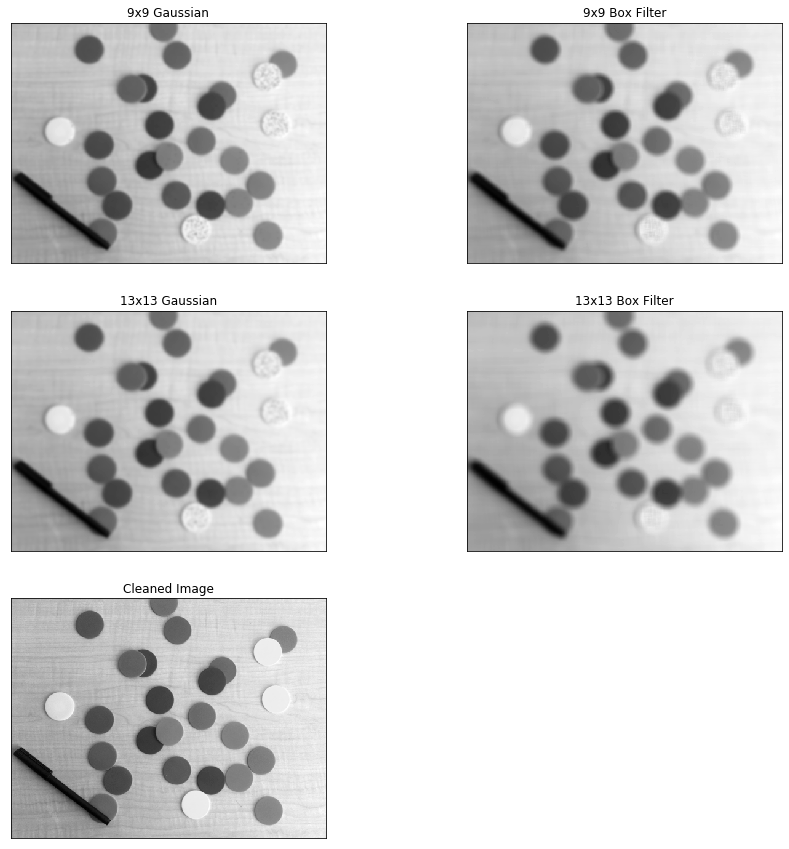

9x9 Box Filter:  29.702945985063085
9x9 Gaussian Blur:  32.68088696045268
13x13 Box Filter:  27.764752147154987
13x13 Gaussian Blur:  31.195515362902498


In [93]:
img = cv2.imread('Circles_gauss.png')
img2 = cv2.imread('Circles.png')

# convert from BGR to RGB for displaying
img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 =cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# filter image using box filter and Gaussian Filter 9x9
res1 = cv2.blur(img,(9,9),0)
res2 = cv2.GaussianBlur(img,(9,9),0)

# filter image using box filter and Gaussian Filter 13x13
res3 = cv2.blur(img,(13,13),0)
res4 = cv2.GaussianBlur(img,(13,13),0)


plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(res2, cmap='gray'),plt.title('9x9 Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(res1, cmap='gray'),plt.title('9x9 Box Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img2, cmap='gray'),plt.title('Cleaned Image')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(res3,cmap='gray'),plt.title('13x13 Box Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(res4,cmap='gray'),plt.title('13x13 Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

print("9x9 Box Filter: ",cv2.PSNR(res1,img2))
print("9x9 Gaussian Blur: ",cv2.PSNR(res2,img2))

print("13x13 Box Filter: ",cv2.PSNR(res3,img2))
print("13x13 Gaussian Blur: ",cv2.PSNR(res4,img2))

At 9x9 filter, both the images become blurrier. The image with box filter becomes more blurrier than the 5x5 image. PSNR decreases for both the images. For Gaussian visually it looks like the image quality has increased but for box filter image that's not the case. The edges have been blurred and the contrast decreased.

At 13x13 filter, both Gaussian and box filter images become blurrier. At 13x13 it is more blurry than it was at 9x9. The PSNR decreased for both the images. The image quality has dropped for both of them. The edges have been blurred and the contrast decreased.

PSNR Gaussian:  28.953329651039414
PSNR Median:  37.33274084761202


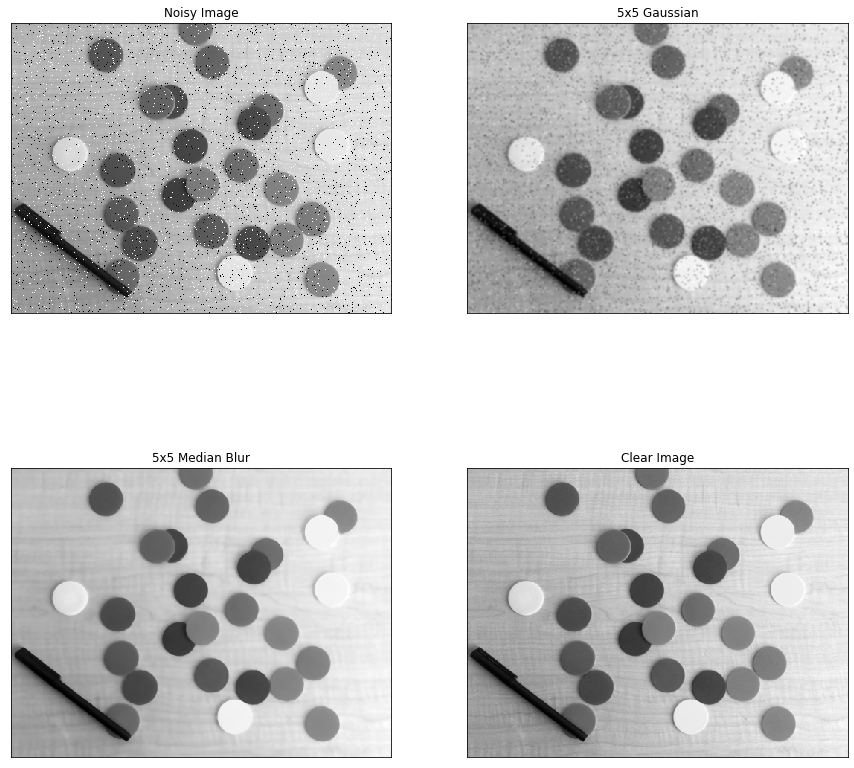

In [94]:
img = cv2.imread('Circles_sp.png')
img2 = cv2.imread('Circles.png')

#Convert to Grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#5x5 Gaussian Filter
res1 = cv2.GaussianBlur(img,(5,5),0)

#median Blur
res2 = cv2.medianBlur(img,5)

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(res1, cmap='gray'), plt.title('5x5 Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(res2, cmap='gray'), plt.title('5x5 Median Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img2, cmap='gray'), plt.title('Clear Image')
plt.xticks([]),plt.yticks([])

print("PSNR Gaussian: ",cv2.PSNR(res1, img2))
print("PSNR Median: ",cv2.PSNR(res2, img2))

The PSNR of the median filter is much higher than that of the Gaussian filter. Median filter is a better option for removing salt and pepper noise. This gives better result.

PSNR 9x9 Gaussian:  30.634352712966955
PSNR 9x9 Median:  34.60865751312264
PSNR 13x13 Gaussian:  30.253212790182523
PSNR 13x13 Median:  32.56250512796975


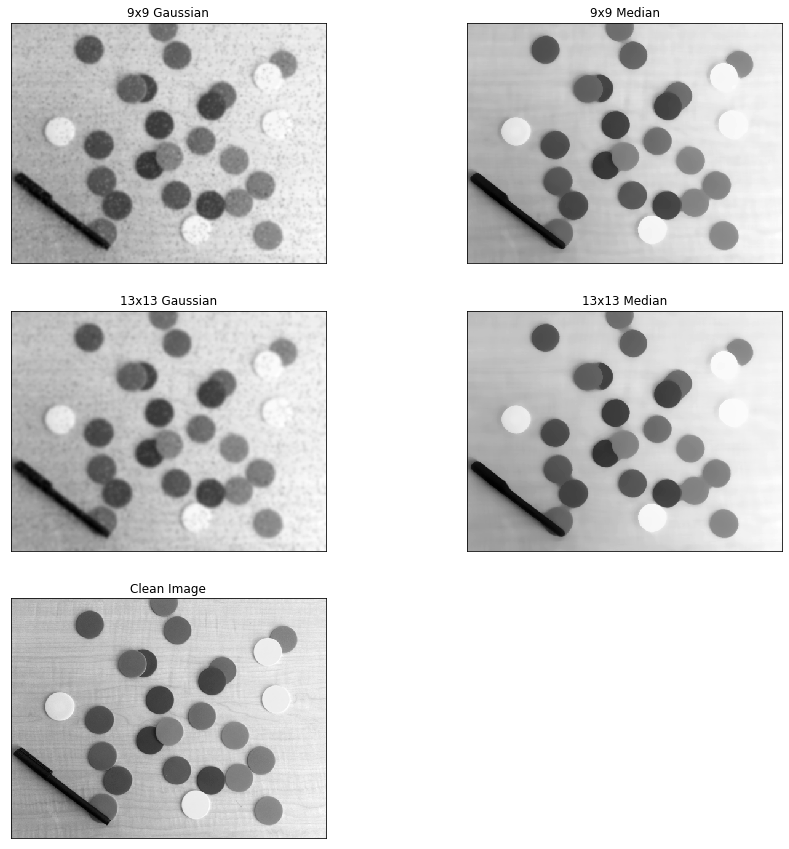

In [95]:
img = cv2.imread('Circles_sp.png')
img2 = cv2.imread('Circles.png')

#Convert it to Grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#9x9 filter
res1 = cv2.GaussianBlur(img,(9,9),0)
res2 = cv2.medianBlur(img,9)

#13x13 filter
res3 = cv2.GaussianBlur(img,(13,13),0)
res4 = cv2.medianBlur(img,13)


plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(res1, cmap='gray'), plt.title('9x9 Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(res2, cmap='gray'), plt.title('9x9 Median')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(res3, cmap='gray'), plt.title('13x13 Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(res4, cmap='gray'), plt.title('13x13 Median')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img2, cmap='gray'), plt.title('Clean Image')
plt.xticks([]), plt.yticks([])

print("PSNR 9x9 Gaussian: ",cv2.PSNR(res1, img2))
print("PSNR 9x9 Median: ",cv2.PSNR(res2, img2))
print("PSNR 13x13 Gaussian: ",cv2.PSNR(res3, img2))
print("PSNR 13x13 Median: ",cv2.PSNR(res4, img2))


At 9x9 filter, the PSNR increases for Gaussian and for median it decreases. For Gaussian the image quality increases. There are less salt and pepper noise now. For median the edges loses their sharpness and the image becomes smooth

At 13x13, the PSNR for Gaussian remains the same compared to 9x9. For median, the PSNR decreases. In the Gaussian the image quality has increased since there are less salt and paper now compared to 9x9 gaussian image. However, it has become a bit blurrier than before. 13x13 median image is smoother comparatively and the edges have lost their contrast.

# 2.2 - Sharpening 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

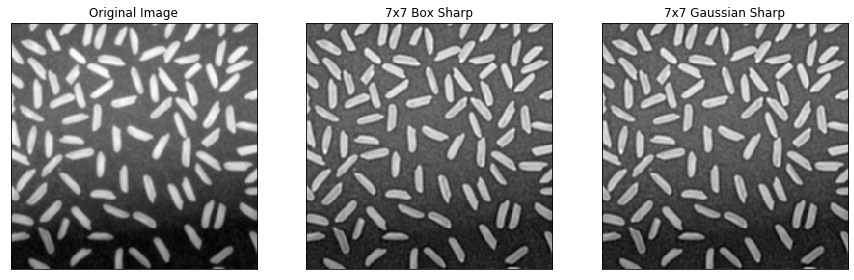

In [96]:
#Create sharpening method
def sharp(img1,img2):
    details = img1-img2
    sharpened_image = img1+details
    return sharpened_image

img=cv2.imread('rice.png')

#Convert to grayscale
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#7x7 Box filter
res1 = cv2.blur(img,(7,7),0)

#7x7 Gaussian filter
res2 = cv2.GaussianBlur(img,(7,7),0)

#Sharpening images using sharp method
sharp_box = sharp(img,res1)
sharp_gaussian = sharp(img, res2)

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(sharp_box, cmap='gray'), plt.title("7x7 Box Sharp")
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sharp_box, cmap='gray'), plt.title("7x7 Gaussian Sharp")
plt.xticks([]), plt.yticks([])


A box filter is a high pass filter while a gaussian filter is a low pass filter. So the box filter is expected to give better results since it will increase the contrast between bright and dark pixel to produce a sharpen image.

The difference in results are not very noticeable.

# 3.1 - Sobel Edge Detector

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

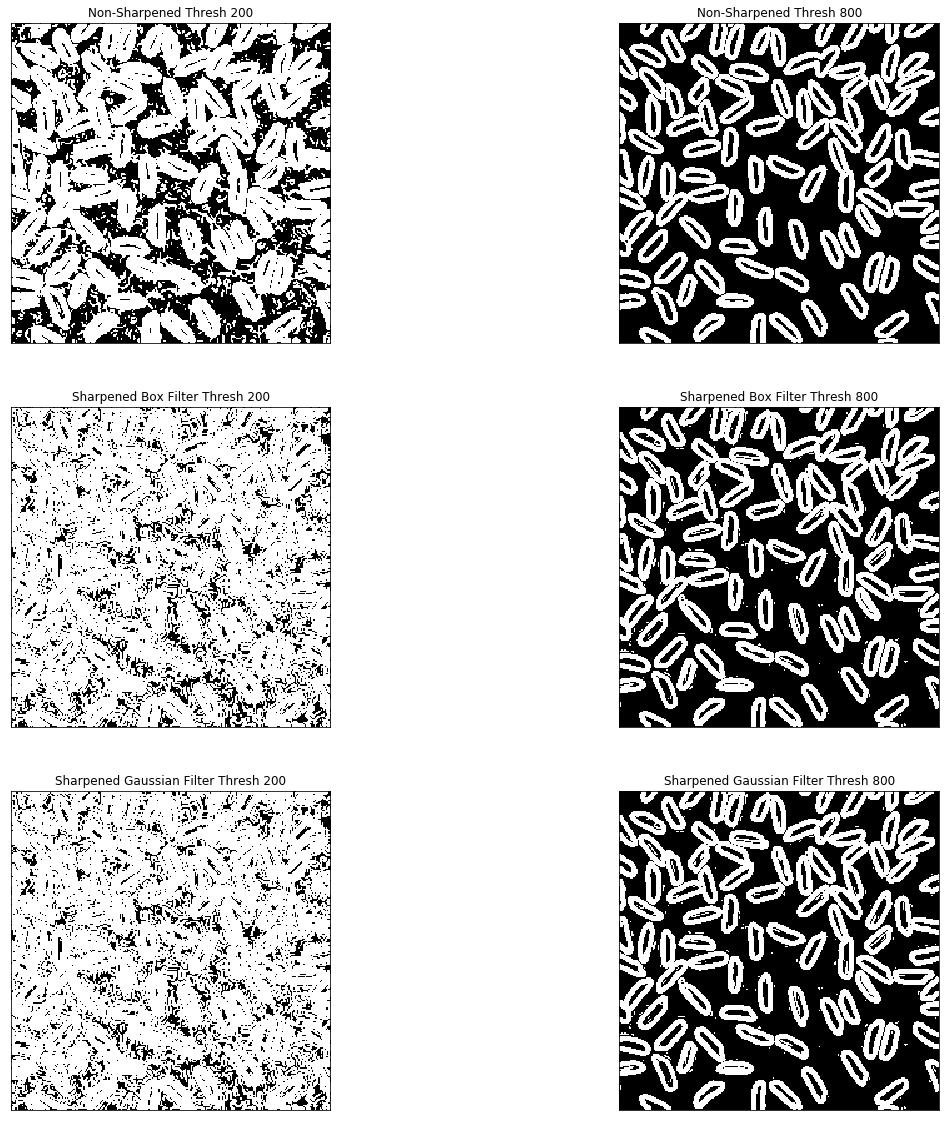

In [97]:
img=cv2.imread('rice.png')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

THRESH1 = 200
THRESH2 = 800

# apply 5x5 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y) # magnitude
ret, img_thresh1 = cv2.threshold(I_m, THRESH1, 255, cv2.THRESH_BINARY) #Thresh 200
ret, img_thresh2 = cv2.threshold(I_m, THRESH2, 255, cv2.THRESH_BINARY) #Thresh 800

# apply sobel edge detector to previously sharpened box filter image
I_x1 = cv2.Sobel(sharp_box, cv2.CV_64F, 1, 0, ksize=5)
I_y1 = cv2.Sobel(sharp_box, cv2.CV_64F, 0, 1, ksize=5)
I_m1 = cv2.magnitude(I_x1,I_y1) # magnitude
ret, img_thresh3 = cv2.threshold(I_m1, THRESH1, 255, cv2.THRESH_BINARY) #Thresh 200
ret, img_thresh4 = cv2.threshold(I_m1, THRESH2, 255, cv2.THRESH_BINARY) #Thresh 800

# apply sobel edge detector to previously sharpened gaussian filter image
I_x2 = cv2.Sobel(sharp_gaussian, cv2.CV_64F, 1, 0, ksize=5)
I_y2 = cv2.Sobel(sharp_gaussian, cv2.CV_64F, 0, 1, ksize=5)
I_m2 = cv2.magnitude(I_x1,I_y1) # magnitude
ret, img_thresh5 = cv2.threshold(I_m1, THRESH1, 255, cv2.THRESH_BINARY) #Thresh 200
ret, img_thresh6 = cv2.threshold(I_m1, THRESH2, 255, cv2.THRESH_BINARY) #Thresh 800

plt.figure(figsize=(20, 20))
plt.subplot(321), plt.imshow(img_thresh1, cmap="gray"),plt.title("Non-Sharpened Thresh 200") 
plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_thresh2, cmap="gray"),plt.title("Non-Sharpened Thresh 800") 
plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(img_thresh3, cmap="gray"),plt.title("Sharpened Box Filter Thresh 200") 
plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(img_thresh4, cmap="gray"),plt.title("Sharpened Box Filter Thresh 800") 
plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(img_thresh5, cmap="gray"),plt.title("Sharpened Gaussian Filter Thresh 200") 
plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(img_thresh6, cmap="gray"),plt.title("Sharpened Gaussian Filter Thresh 800") 
plt.xticks([]), plt.yticks([])

The less blur we apply, the finer the edges that will be detected so using sharpening prior to edge detection actually ends up creating small white pixels. Sharpening the image creates more details and those get detected in edge detection.

Threshold prevents the image from over sharpening. 

At Thresh 200 both the sharpened images have details of white pixels, which interfere in edge detection so the images ends up having multiple edges of 'imaginary' objects. Same effect is seen with the non-sharpened image at Thresh 200 but the details of white pixels are less visible there.

At Thresh 800, the images are much better. The non-sharpened image while going through edge detection ends up producing an image with fine edges of the objest. The same can be said for the sharpened images with a slight variation of having a few white pixels on the images.

### Denoising on Edge Detection

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

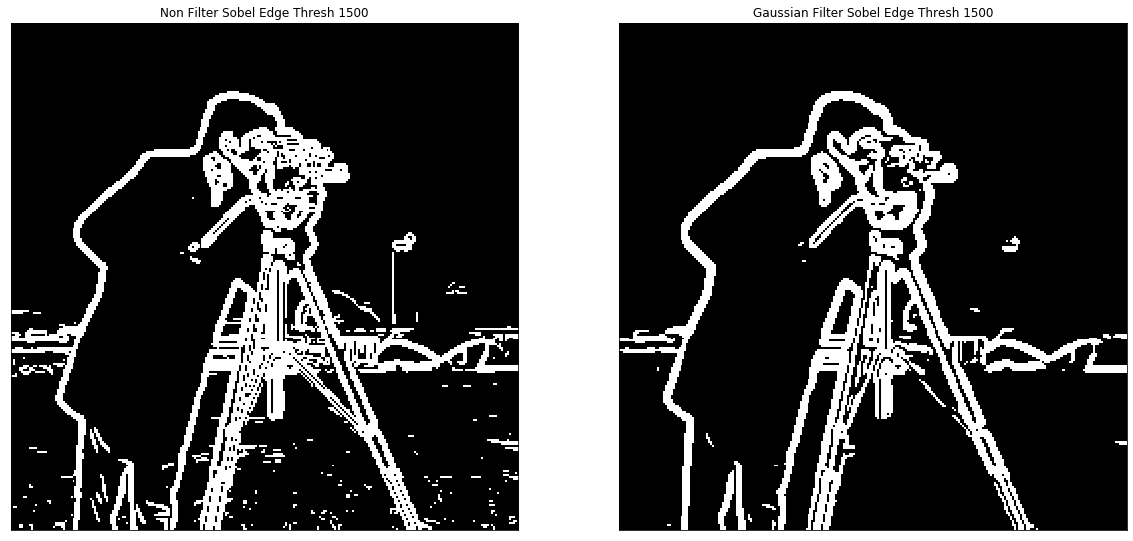

In [98]:
img = cv2.imread('cameraman.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply 5x5 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y) # magnitude

ret, img_thresh1 = cv2.threshold(I_m, 1500, 255, cv2.THRESH_BINARY)

#denoise image with a 5x5 gaussian filter
res1 = cv2.GaussianBlur(img,(5,5),0)

#sobel edge detector
I_x1 = cv2.Sobel(res1, cv2.CV_64F, 1, 0, ksize=5)
I_y1 = cv2.Sobel(res1, cv2.CV_64F, 0, 1, ksize=5)
I_m1 = cv2.magnitude(I_x1, I_y1) # magnitude

ret, img_thresh2 = cv2.threshold(I_m1, 1500, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(img_thresh1, cmap='gray'), plt.title("Non Filter Sobel Edge Thresh 1500")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh2, cmap='gray'), plt.title("Gaussian Filter Sobel Edge Thresh 1500")
plt.xticks([]), plt.yticks([])

Adding a gaussian filter before edge detection eliminates extra unnecessary details that would get caught up when using the Sobel filter alone at threshold 1500. With the gaussian filter and sobel edge detection it focuses on the details of the centre of the image that is the camera and ignores the details of its surroundings, which are significantly less important in this image.

## 3.2 - Laplacian of Gaussian

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

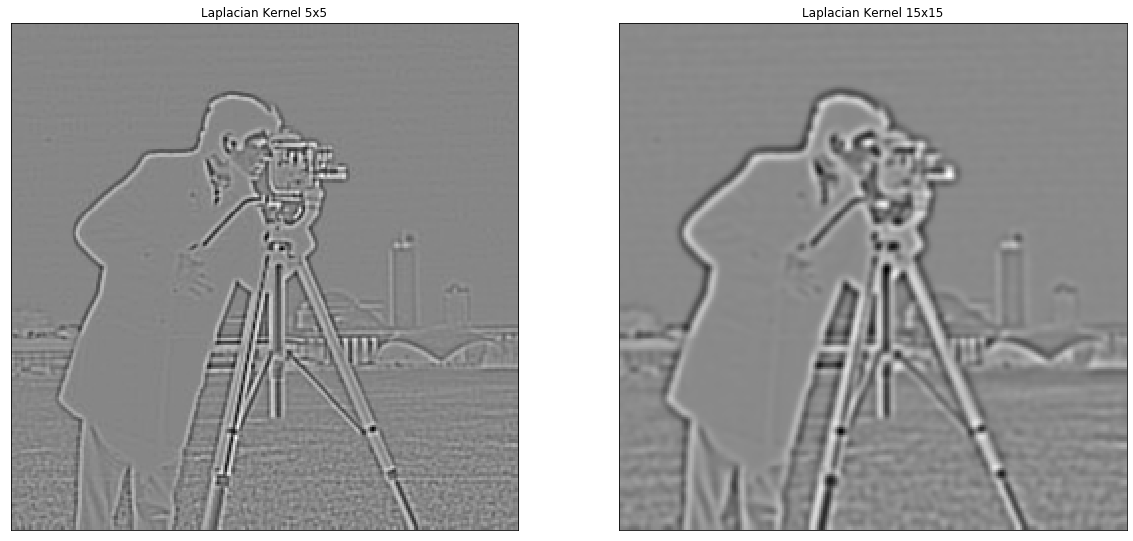

In [99]:
img = cv2.imread('cameraman.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply 5x5 Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(img, cv2.CV_32F, ksize=5)

# apply 5x5 Laplacian filter to the intensity channel
I_lap1 = cv2.Laplacian(img, cv2.CV_32F, ksize=15)


plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(I_lap, cmap='gray'), plt.title("Laplacian Kernel 5x5")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_lap1, cmap='gray'), plt.title("Laplacian Kernel 15x15")
plt.xticks([]), plt.yticks([])

Laplacian filters are derivative filters so both the images are smooth. Both the images have sharpened edges but with kernel 15, the image is more smooth and blurry but the edges of the main element in the images are more precise. With Kernel 5, even the surroundings' edges have been detected and it's not solely focused on the cameraman but with kernel 15, the image focuses on the detailed edges of the camera man. Localization on Kernel 15 is poor compared to Kernel 5.

## 3.3 - Canny Edge Detection

1 - Filter image with x, y derivatives of Gaussian
2 - Find magnitude and orientation of gradient
3 - Non‐maximum suppression:
    • Thin multi‐pixel wide “ridges” down to single pixel width
4 - Define two thresholds: low and high and use the high threshold to start edge curves and the low threshold to     continue them



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

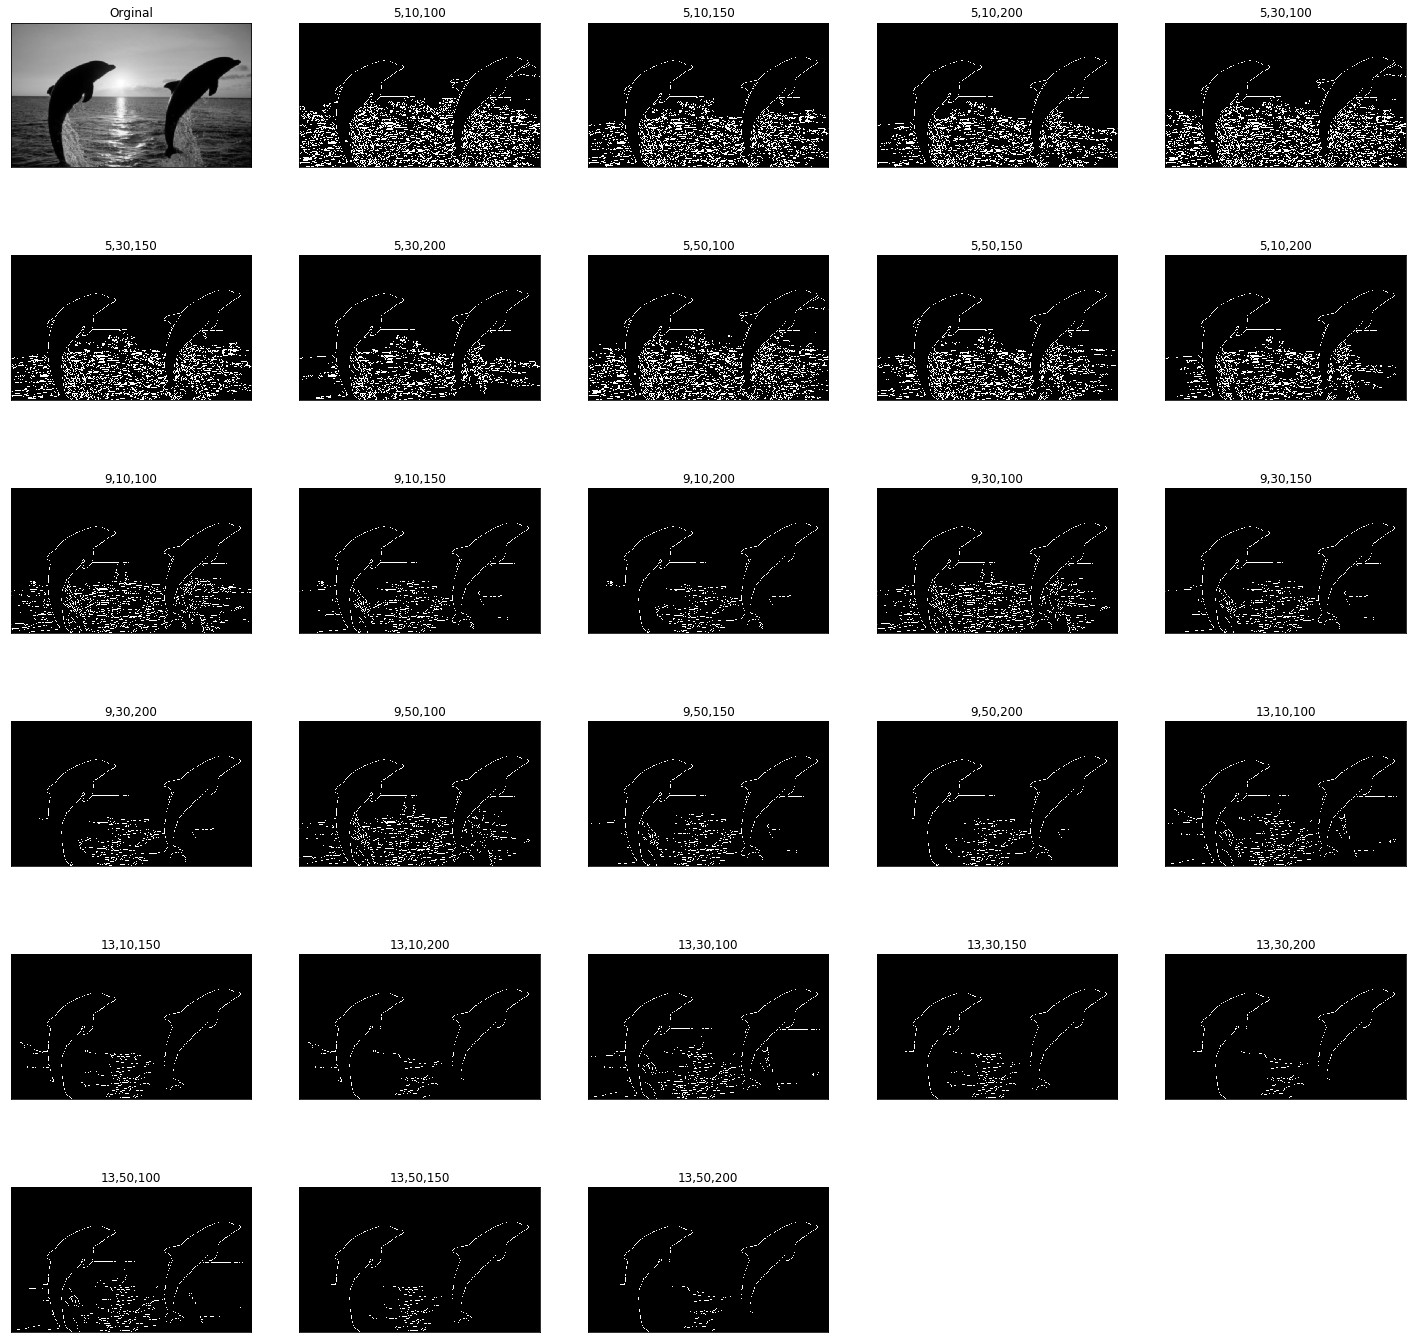

In [100]:
img = cv2.imread('dolphin.jpg')

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img1 = img.copy()
img2 = img.copy()

# K = 5, L = 10,30,50, H = 100,150,200 
img = cv2.GaussianBlur(img, (5, 5), 0)
I_edge1 = cv2.Canny(img, 10, 100)
I_edge2 = cv2.Canny(img, 10, 150)
I_edge3 = cv2.Canny(img, 10, 200)

I_edge4 = cv2.Canny(img, 30, 100)
I_edge5 = cv2.Canny(img, 30, 150)
I_edge6 = cv2.Canny(img, 30, 250)

I_edge7 = cv2.Canny(img, 50, 100)
I_edge8 = cv2.Canny(img, 50, 150)
I_edge9 = cv2.Canny(img, 50, 200)

# K = 9, L = 10,30,50, H = 100,150,200 
img2 = cv2.GaussianBlur(img2, (9, 9), 0)
I_edge10 = cv2.Canny(img2, 10, 100)
I_edge11 = cv2.Canny(img2, 10, 150)
I_edge12 = cv2.Canny(img2, 10, 200)

I_edge13 = cv2.Canny(img2, 30, 100)
I_edge14 = cv2.Canny(img2, 30, 150)
I_edge15 = cv2.Canny(img2, 30, 200)

I_edge16 = cv2.Canny(img2, 50, 100)
I_edge17 = cv2.Canny(img2, 50, 150)
I_edge18 = cv2.Canny(img2, 50, 200)

# K = 13, L = 10,30,50, H = 100,150,200 
img1 = cv2.GaussianBlur(img1, (13, 13), 0)
I_edge19 = cv2.Canny(img1, 10, 100)
I_edge20 = cv2.Canny(img1, 10, 150)
I_edge21 = cv2.Canny(img1, 10, 200)

I_edge22 = cv2.Canny(img1, 30, 100)
I_edge23 = cv2.Canny(img1, 30, 150)
I_edge24 = cv2.Canny(img1, 30, 200)

I_edge25 = cv2.Canny(img1, 50, 100)
I_edge26 = cv2.Canny(img1, 50, 150)
I_edge27 = cv2.Canny(img1, 50, 200)




plt.figure(figsize=(25,25))
plt.subplot(6,5,1), plt.imshow(img, cmap='gray'), plt.title("Orginal")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,2), plt.imshow(I_edge1, cmap='gray'), plt.title("5,10,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,3), plt.imshow(I_edge2, cmap='gray'), plt.title("5,10,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,4), plt.imshow(I_edge3, cmap='gray'), plt.title("5,10,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,5), plt.imshow(I_edge4, cmap='gray'), plt.title("5,30,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,6), plt.imshow(I_edge5, cmap='gray'), plt.title("5,30,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,7), plt.imshow(I_edge6, cmap='gray'), plt.title("5,30,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,8), plt.imshow(I_edge7, cmap='gray'), plt.title("5,50,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,9), plt.imshow(I_edge8, cmap='gray'), plt.title("5,50,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,10), plt.imshow(I_edge9, cmap='gray'), plt.title("5,10,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,11), plt.imshow(I_edge10, cmap='gray'), plt.title("9,10,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,12), plt.imshow(I_edge11, cmap='gray'), plt.title("9,10,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,13), plt.imshow(I_edge12, cmap='gray'), plt.title("9,10,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,14), plt.imshow(I_edge13, cmap='gray'), plt.title("9,30,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,15), plt.imshow(I_edge14, cmap='gray'), plt.title("9,30,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,16), plt.imshow(I_edge15, cmap='gray'), plt.title("9,30,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,17), plt.imshow(I_edge16, cmap='gray'), plt.title("9,50,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,18), plt.imshow(I_edge17, cmap='gray'), plt.title("9,50,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,19), plt.imshow(I_edge18, cmap='gray'), plt.title("9,50,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,20), plt.imshow(I_edge19, cmap='gray'), plt.title("13,10,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,21), plt.imshow(I_edge20, cmap='gray'), plt.title("13,10,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,22), plt.imshow(I_edge21, cmap='gray'), plt.title("13,10,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,23), plt.imshow(I_edge22, cmap='gray'), plt.title("13,30,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,24), plt.imshow(I_edge23, cmap='gray'), plt.title("13,30,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,25), plt.imshow(I_edge24, cmap='gray'), plt.title("13,30,200")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,26), plt.imshow(I_edge25, cmap='gray'), plt.title("13,50,100")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,27), plt.imshow(I_edge26, cmap='gray'), plt.title("13,50,150")
plt.xticks([]), plt.yticks([])
plt.subplot(6,5,28), plt.imshow(I_edge27, cmap='gray'), plt.title("13,50,200")
plt.xticks([]), plt.yticks([])




Observing all the images, when it comes to double threshold it can be seen that the higher threshold has the most significant effect, while the lower threshold alone does not cause any significant differences to the images. Increasing the Kernel size, focuses on the central main image which in our case are the dolphins and it avoids detecting unnecessary noises or details. There is a relationship between the upper threshold and lower threshold. It can be seen they work best, when the upper threshold is around 4 times the lower threshold.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

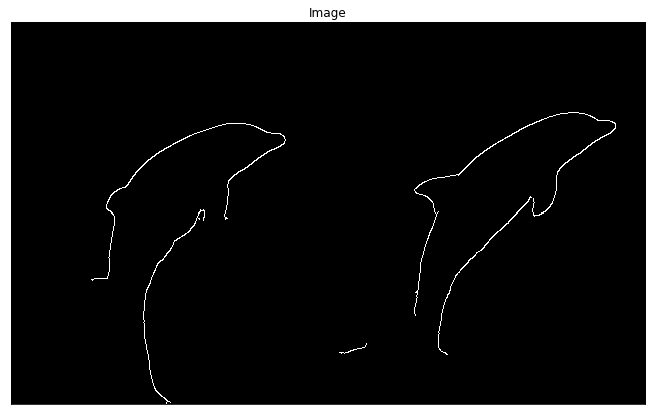

In [101]:
img = cv2.imread('dolphin.jpg')

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.GaussianBlur(img, (13, 13), 0)
I_edge = cv2.Canny(img, 40, 240)

plt.figure(figsize=(25,25))
plt.subplot(121), plt.imshow(I_edge, cmap='gray'), plt.title("Image")
plt.xticks([]), plt.yticks([])

The value of each hyper-parameter such that only the dolphin edges are detected are: Kernel size(K): 13, Lower Threshold (L): 40, Higher Threshold (H): 240